In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

In [3]:
df=pd.read_csv("heart_disease.csv")
df.head(15)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,male,2,140,289,False,0,172,0,0.0,1,False
1,49,female,3,160,180,False,0,156,0,1.0,2,True
2,37,male,2,130,283,False,1,98,0,0.0,1,False
3,48,female,4,138,214,False,0,108,1,1.5,2,True
4,54,male,3,150,195,False,0,122,0,0.0,1,False
5,39,male,3,120,339,False,0,170,0,0.0,1,False
6,45,female,2,130,237,False,0,170,0,0.0,1,False
7,54,male,2,110,208,False,0,142,0,0.0,1,False
8,37,male,4,140,207,False,0,130,1,1.5,2,True
9,48,female,2,120,284,False,0,120,0,0.0,1,False


In [4]:
le=LabelEncoder()
for column in df.columns :
    df.loc[:,column]=le.fit_transform(df.loc[:,column])

In [5]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer.fit(df.iloc[:, :])
df.iloc[:, :] = imputer.transform(df.iloc[:, :])  
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,12,1.0,1,41,147,0,0,98,0,10.0,1,0
1,21,0.0,2,55,40,0,0,82,0,20.0,2,1
2,9,1.0,1,31,141,0,1,25,0,10.0,1,0
3,20,0.0,3,39,72,0,0,34,1,25.0,2,1
4,26,1.0,2,49,53,0,0,48,0,10.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,17,1.0,0,14,122,0,0,58,0,22.0,2,1
1186,40,1.0,3,45,51,1,0,67,0,42.0,2,1
1187,29,1.0,3,31,9,0,0,41,1,22.0,2,1
1188,29,0.0,1,31,94,0,2,100,0,10.0,2,1


In [6]:
class_1=sum(df["target"]==1)
print(f"length of class 1 = >{class_1}")
print(f"length of class 0 => {1190-class_1}")

length of class 1 = >629
length of class 0 => 561


In [7]:
df.drop_duplicates(inplace=True)


In [8]:
df=df.reset_index(drop=True)
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,12,1.0,1,41,147,0,0,98,0,10.0,1,0
1,21,0.0,2,55,40,0,0,82,0,20.0,2,1
2,9,1.0,1,31,141,0,1,25,0,10.0,1,0
3,20,0.0,3,39,72,0,0,34,1,25.0,2,1
4,26,1.0,2,49,53,0,0,48,0,10.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,17,1.0,0,14,122,0,0,58,0,22.0,2,1
914,40,1.0,3,45,51,1,0,67,0,42.0,2,1
915,29,1.0,3,31,9,0,0,41,1,22.0,2,1
916,29,0.0,1,31,94,0,2,100,0,10.0,2,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  918 non-null    int64  
 1   sex                  918 non-null    object 
 2   chest pain type      918 non-null    int64  
 3   resting bp s         918 non-null    int64  
 4   cholesterol          918 non-null    int64  
 5   fasting blood sugar  918 non-null    int64  
 6   resting ecg          918 non-null    int64  
 7   max heart rate       918 non-null    int64  
 8   exercise angina      918 non-null    int64  
 9   oldpeak              918 non-null    float64
 10  ST slope             918 non-null    int64  
 11  target               918 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 86.2+ KB


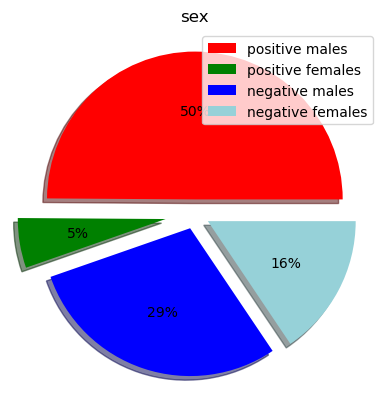

In [10]:
females=df[df['sex']==0]
males=df[df['sex']==1]

explode=(0.1,0.2,0.1,0.1)

p_female=sum(females['target']==1)
p_male=sum(males['target']==1)
n_female=sum(females['target']==0)
n_male=sum(males['target']==0)

plt.pie([p_male,p_female,n_male,n_female],autopct='%1.0f%%',
        explode = explode , shadow=True , colors= ['r','g','b',"#96D1D8"],labeldistance=1.11
)
plt.title("sex")
plt.legend(labels=['positive males','positive females','negative males','negative females'])
plt.show()

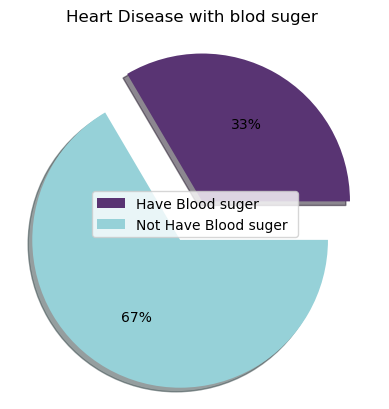

In [11]:
patient=df[df['target']==1]

have_bs=sum(patient['fasting blood sugar']==1)
n_have_bs=sum(patient['fasting blood sugar']==0)


plt.pie([have_bs,n_have_bs],
        
        autopct='%1.0f%%',
        explode = (0.1,0.2) , shadow=True , colors= ['#593473',"#96D1D8"]
)

plt.legend(labels=['Have Blood suger ',"Not Have Blood suger "])

plt.title("Heart Disease with blod suger ")
plt.show()

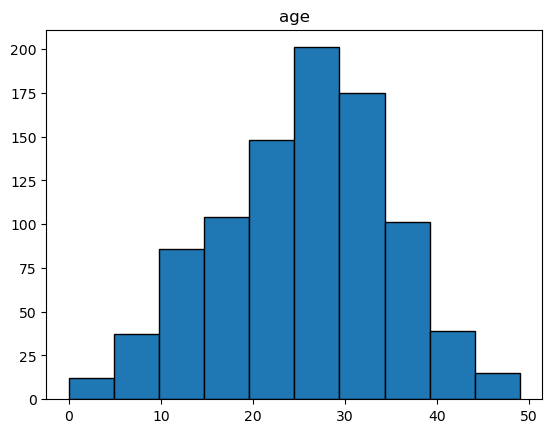

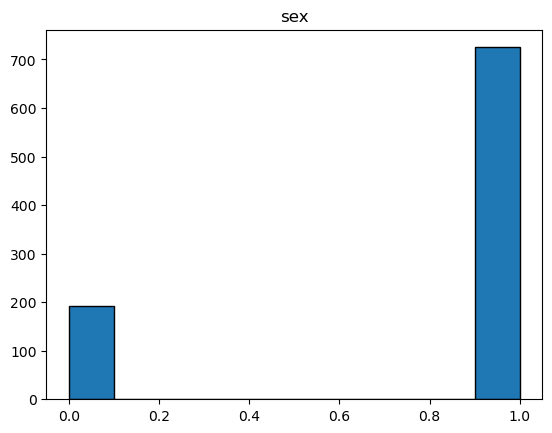

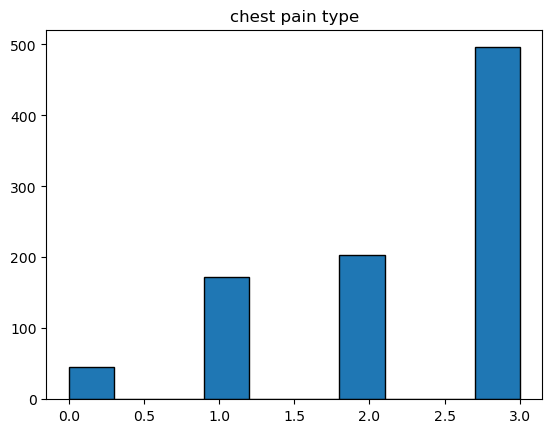

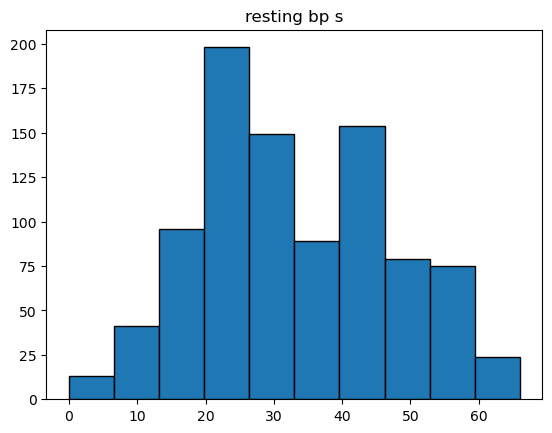

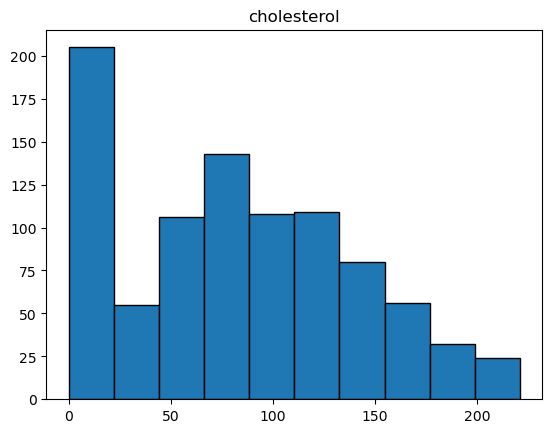

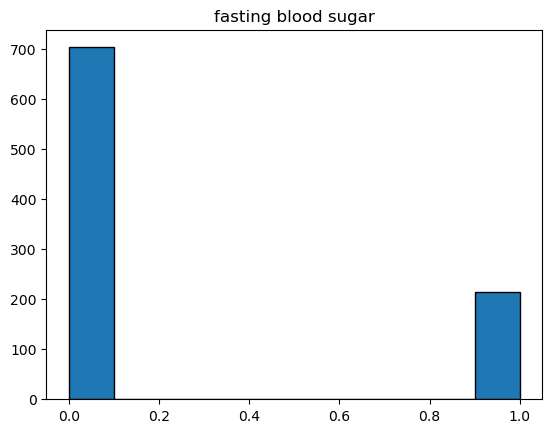

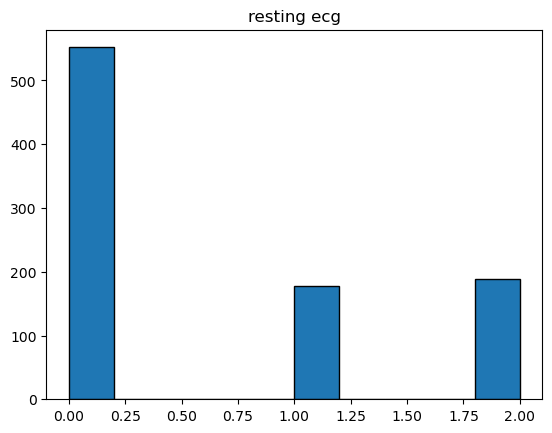

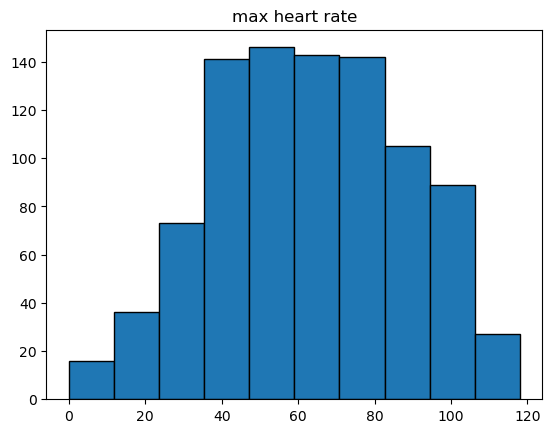

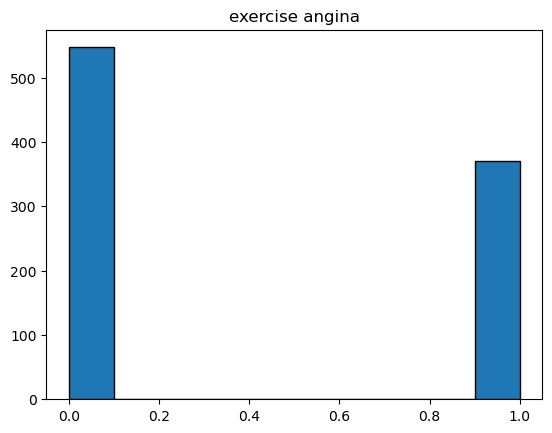

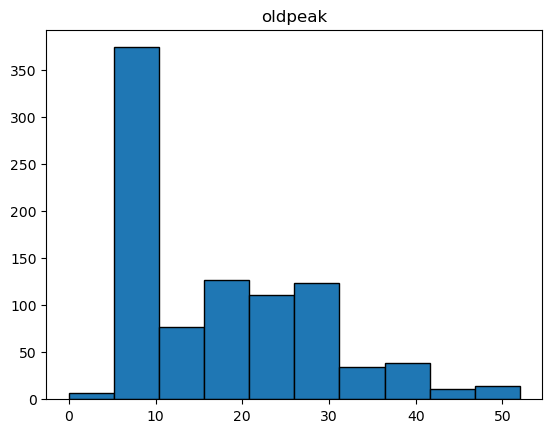

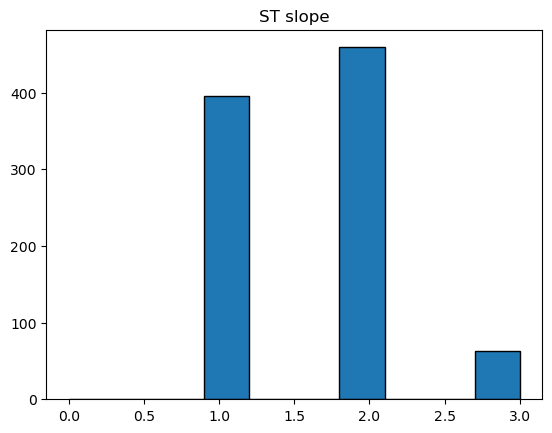

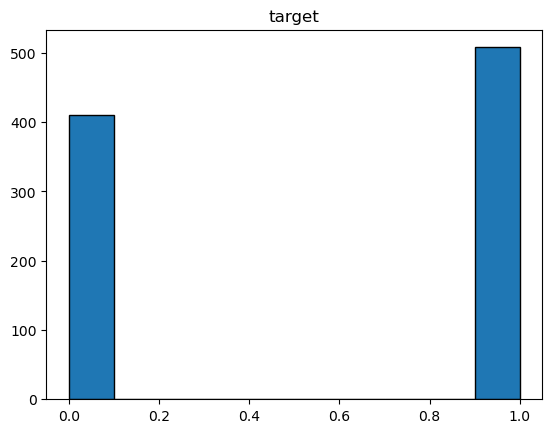

In [12]:
features=df.columns
n_features=len(features)

for i in range(n_features):
    plt.hist(df.iloc[:,i],edgecolor='black')
    plt.title(features[i])
    plt.show()

--preprocessing--

In [13]:
class_1=sum(df["target"]==1)
print(f"length of class 1 => {class_1}")
print(f"length of class 0 => {918-class_1}")

length of class 1 => 508
length of class 0 => 410


In [14]:
from imblearn.over_sampling import SMOTE 

from sklearn.model_selection import train_test_split  

from sklearn.metrics import classification_report



x= df.iloc[:, :-1] 
  
y= df.iloc[:, -1]

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3)  

print("Before OverSampling  # 1 =",sum(y_train == 1)) 
print("Before OverSampling  # 0 =",sum(y_train == 0)) 


sm = SMOTE()
x_train, y_train = sm.fit_resample(x_train, y_train)

print("-----------------------------------------")
print("After OverSampling  # 1 =",sum(y_train == 1)) 
print("After OverSampling  # 0 =",sum(y_train == 0)) 

Before OverSampling  # 1 = 364
Before OverSampling  # 0 = 278
-----------------------------------------
After OverSampling  # 1 = 364
After OverSampling  # 0 = 364


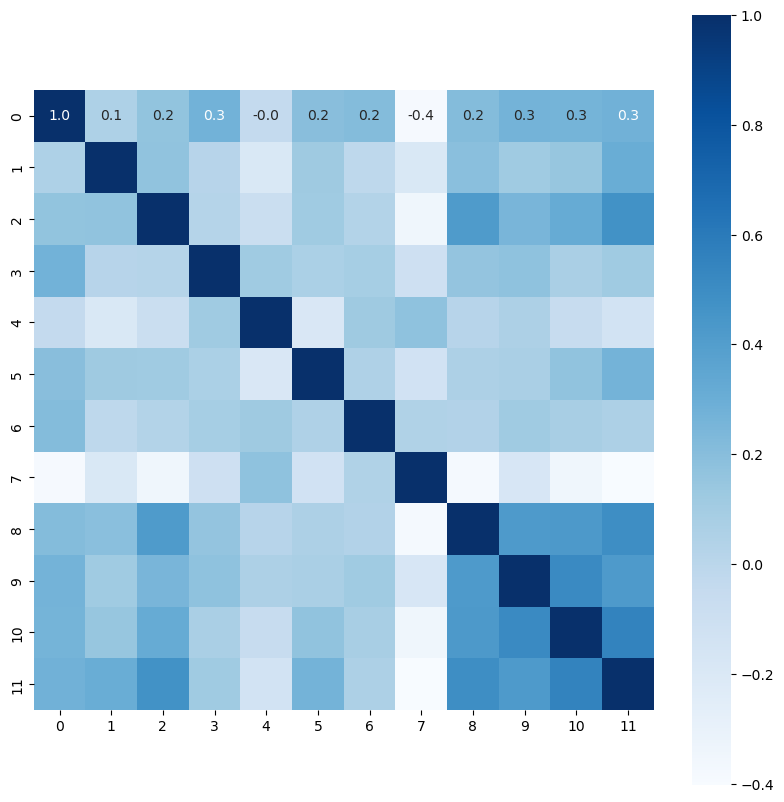

In [28]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), square=True, cmap='Blues', annot=True, fmt='0.1f');

In [15]:
from sklearn .preprocessing import MinMaxScaler 
mini_max_scale = MinMaxScaler()
df=pd.DataFrame(mini_max_scale.fit_transform(df))
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.244898,1.0,0.333333,0.621212,0.665158,0.0,0.0,0.830508,0.0,0.192308,0.333333,0.0
1,0.428571,0.0,0.666667,0.833333,0.180995,0.0,0.0,0.694915,0.0,0.384615,0.666667,1.0
2,0.183673,1.0,0.333333,0.469697,0.638009,0.0,0.5,0.211864,0.0,0.192308,0.333333,0.0
3,0.408163,0.0,1.000000,0.590909,0.325792,0.0,0.0,0.288136,1.0,0.480769,0.666667,1.0
4,0.530612,1.0,0.666667,0.742424,0.239819,0.0,0.0,0.406780,0.0,0.192308,0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,1.0,0.000000,0.212121,0.552036,0.0,0.0,0.491525,0.0,0.423077,0.666667,1.0
914,0.816327,1.0,1.000000,0.681818,0.230769,1.0,0.0,0.567797,0.0,0.807692,0.666667,1.0
915,0.591837,1.0,1.000000,0.469697,0.040724,0.0,0.0,0.347458,1.0,0.423077,0.666667,1.0
916,0.591837,0.0,0.333333,0.469697,0.425339,0.0,1.0,0.847458,0.0,0.192308,0.666667,1.0


In [16]:

from sklearn.model_selection import GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=6)

pram_grad={'kernel':['linear','poly','sigmoid','rbf'],
           'C':[0.1,0.3,0.5,0.7,0.9,1],
           'degree':[1,2,3,4,5]
          }
grid=GridSearchCV(SVC(),pram_grad)
grid.fit(x_train,y_train)
grid.best_params_

{'C': 0.9, 'degree': 1, 'kernel': 'linear'}

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
svc=SVC(kernel="linear",C=0.9,degree=1)
svc.fit(x_train,y_train)
prediction_scv=svc.predict(x_test)

acc_svc=accuracy_score(y_test,prediction_scv)


In [18]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

kf=KFold(n_splits=5,shuffle=True,random_state=42)
parameter={'n_neighbors': np.arange(2, 30, 1)}

knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn, param_grid=parameter, cv=kf, verbose=1)
knn_cv.fit(x_train, y_train)
print(knn_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'n_neighbors': 28}


In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=28)
knn.fit(x_train,y_train)
prediction_knn=knn.predict(x_test)

acc_knn=accuracy_score(y_test,prediction_knn)


In [20]:

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=17)
rfc.fit(x_train,y_train)
rfc_prd= rfc.predict(x_test)
acc_rfc= accuracy_score(y_test,rfc_prd)


In [30]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion="entropy")
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)


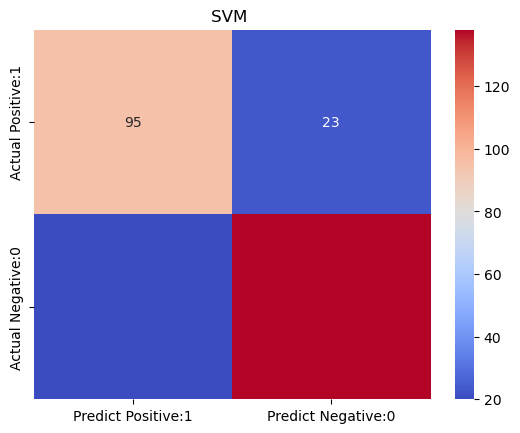

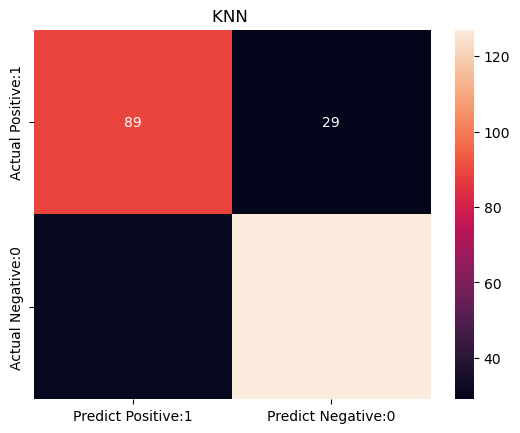

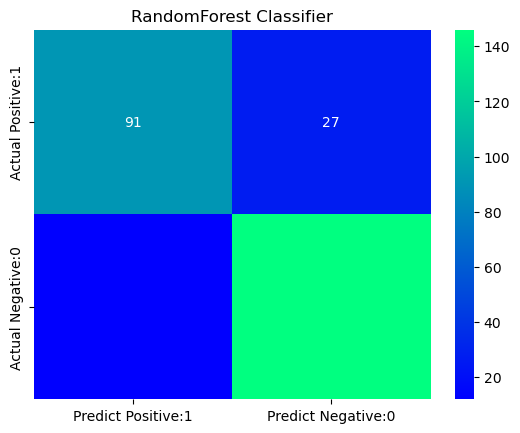

In [29]:
cm_svc=confusion_matrix(y_test,prediction_scv)
svc_conf_matrix=pd.DataFrame(data=cm_svc ,index=['Actual Positive:1', 'Actual Negative:0'], 
                                 columns=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(svc_conf_matrix,cmap='coolwarm',annot=True,fmt='d')
plt.title("SVM ")
plt.show()

#################################################################
cm_knn=confusion_matrix(y_test,prediction_knn)

conf_matrix_knn=pd.DataFrame(cm_knn,index=['Actual Positive:1', 'Actual Negative:0'], 
                                 columns=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(conf_matrix_knn,annot=True,fmt='d')
plt.title("KNN ")
plt.show()
#################################################################
cm_rfc=confusion_matrix(y_test,rfc_prd)
rfc_conf_matrix=pd.DataFrame(data=cm_rfc, index=['Actual Positive:1', 'Actual Negative:0'], 
                                 columns=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(rfc_conf_matrix,cmap='winter',annot=True,fmt='d')
plt.title("RandomForest Classifier")
plt.show()
#############################################################
cm_dt=confusion_matrix(y_test,dt_pred)
dt_conf_matrix=pd.DataFrame(data=cm_dt ,index=['Actual Positive:1', 'Actual Negative:0'], 
                                 columns=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(dt_conf_matrix,cmap='coolwarm',annot=True,fmt='d')
plt.title("Decision Tree")
plt.show()


In [32]:
print(f"Report of SVM \n{classification_report(y_test,prediction_scv)}")
print("#"*50)
print(f"Report of KNN \n{classification_report(y_test,prediction_knn)}")
print("#"*50)
print(f"Report of SVM \n{classification_report(y_test,rfc_prd)}")
print("#"*50)
print(f"Report of SVM \n{classification_report(y_test,dt_pred)}")

Report of SVM 
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       118
           1       0.86      0.87      0.87       158

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276

##################################################
Report of KNN 
              precision    recall  f1-score   support

           0       0.74      0.75      0.75       118
           1       0.81      0.80      0.81       158

    accuracy                           0.78       276
   macro avg       0.78      0.78      0.78       276
weighted avg       0.78      0.78      0.78       276

##################################################
Report of SVM 
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       118
           1       0.84      0.92      0.88       158

    accuracy                       

In [ ]:
pip install scikit-learn  